# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | east ballina
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | massawa
Processing Record 6 of Set 1 | dehui
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | crane
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | champerico
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | revda
Processing Record 20 of Set 1 | anna regina
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | st. john's

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.48,74,69,2.58,PN,1739146040
1,edinburgh of the seven seas,-37.0676,-12.3116,15.82,75,7,4.13,SH,1739146039
2,east ballina,-28.8667,153.5833,26.51,59,27,4.20,AU,1739146104
3,margaret river,-33.9500,115.0667,21.18,75,88,4.50,AU,1739146105
4,massawa,15.6097,39.4500,24.22,76,83,3.16,ER,1739146106


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.48,74,69,2.58,PN,1739146040
1,edinburgh of the seven seas,-37.0676,-12.3116,15.82,75,7,4.13,SH,1739146039
2,east ballina,-28.8667,153.5833,26.51,59,27,4.20,AU,1739146104
3,margaret river,-33.9500,115.0667,21.18,75,88,4.50,AU,1739146105
4,massawa,15.6097,39.4500,24.22,76,83,3.16,ER,1739146106


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

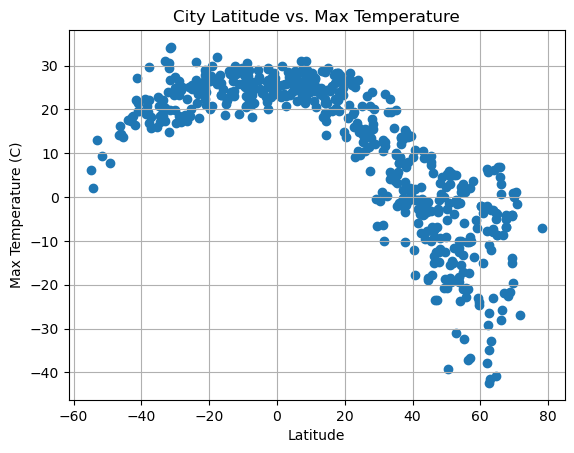

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

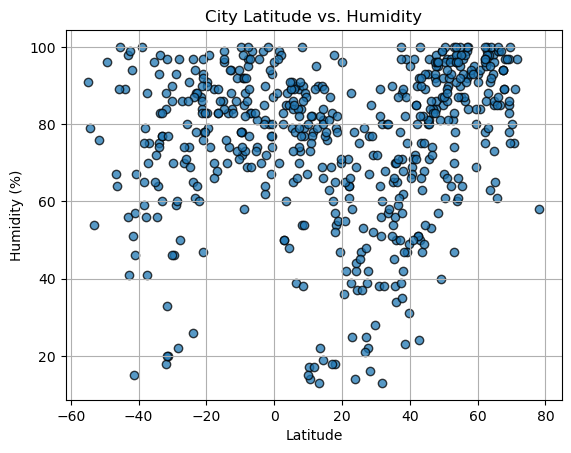

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

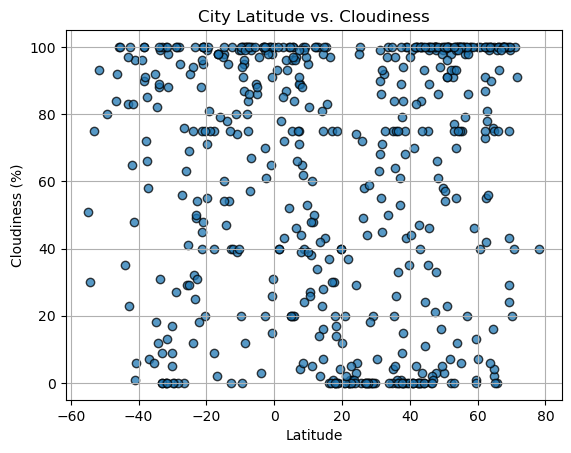

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

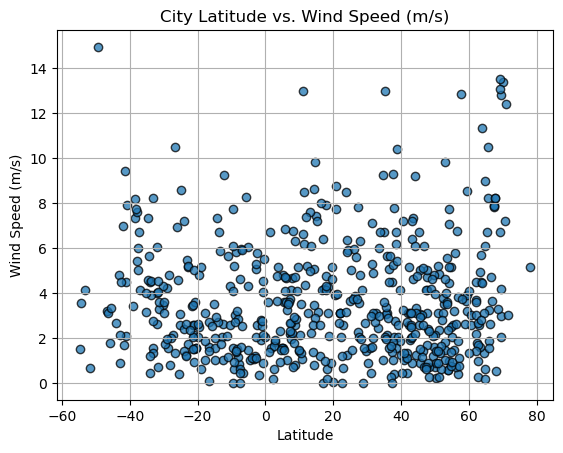

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolor = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = slope * x_values + intercept
    regression_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(regression_eq, (min(x_values), max(y_values) * 0.9), fontsize=12, color="red")
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Display R-squared value
    print(f"R-squared: {rvalue**2:.2f}")
    
    # Show the plot
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,massawa,15.6097,39.4500,24.22,76,83,3.16,ER,1739146106
5,dehui,44.5333,125.7000,-18.89,89,11,3.32,CN,1739146107
6,jamestown,42.0970,-79.2353,-3.88,90,100,3.13,US,1739146108
7,kapuskasing,49.4169,-82.4331,-20.64,99,100,1.19,CA,1739146109
10,crane,31.3974,-102.3501,12.62,56,86,7.09,US,1739146113


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.48,74,69,2.58,PN,1739146040
1,edinburgh of the seven seas,-37.0676,-12.3116,15.82,75,7,4.13,SH,1739146039
2,east ballina,-28.8667,153.5833,26.51,59,27,4.20,AU,1739146104
3,margaret river,-33.9500,115.0667,21.18,75,88,4.50,AU,1739146105
8,port-aux-francais,-49.3500,70.2167,7.89,96,80,14.94,TF,1739146110


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.70


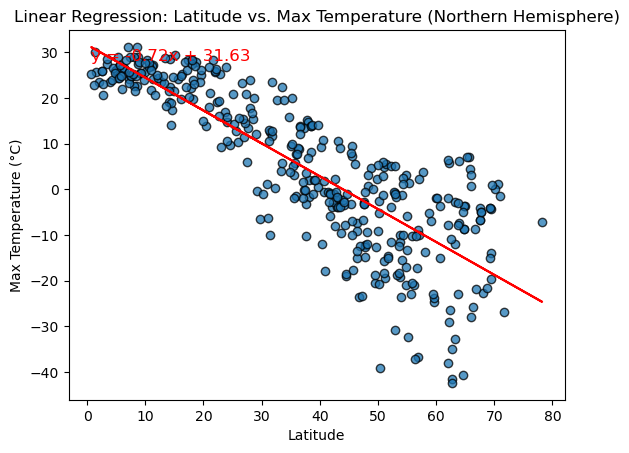

In [54]:
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)", 
    "Latitude", 
    "Max Temperature (°C)"
)

R-squared: 0.34


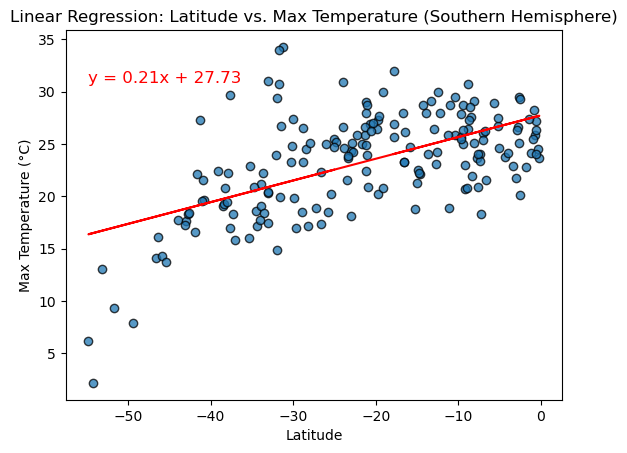

In [56]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)", 
    "Latitude", 
    "Max Temperature (°C)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.12


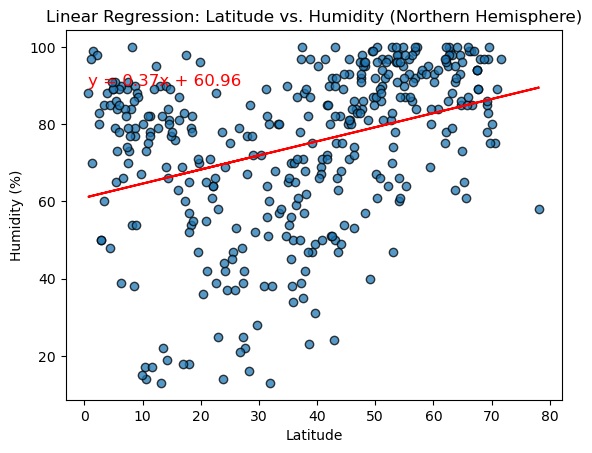

In [58]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Linear Regression: Latitude vs. Humidity (Northern Hemisphere)", 
    "Latitude", 
    "Humidity (%)"
)

R-squared: 0.08


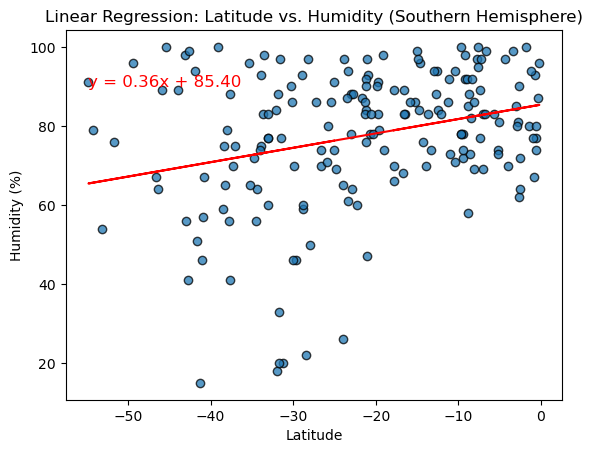

In [60]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Linear Regression: Latitude vs. Humidity (Southern Hemisphere)", 
    "Latitude", 
    "Humidity (%)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.04


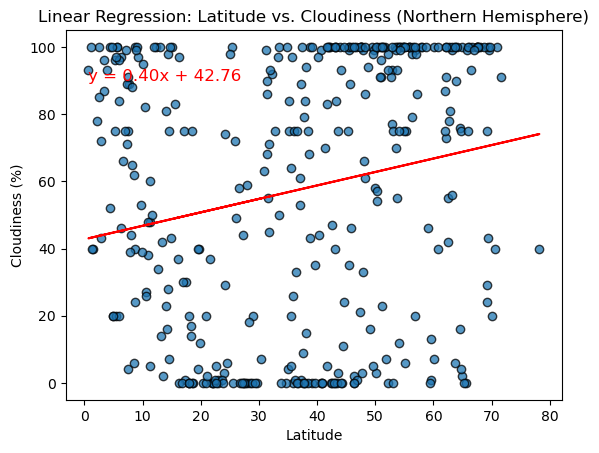

In [64]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)"
)

R-squared: 0.03


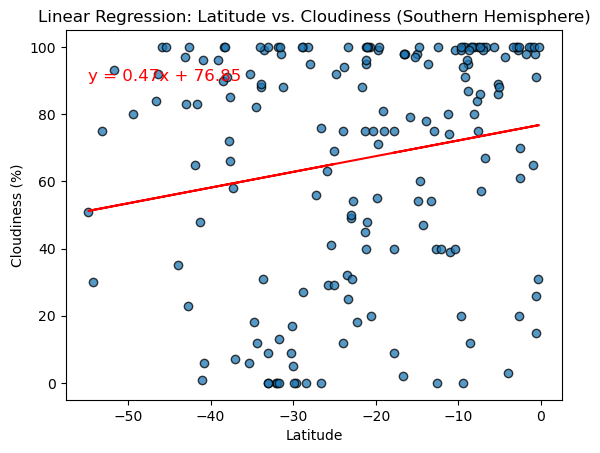

In [66]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)", 
    "Latitude", 
    "Cloudiness (%)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.01


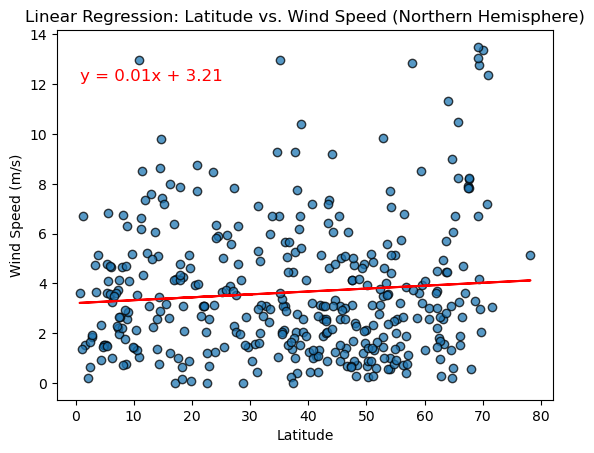

In [68]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)"
)

R-squared: 0.06


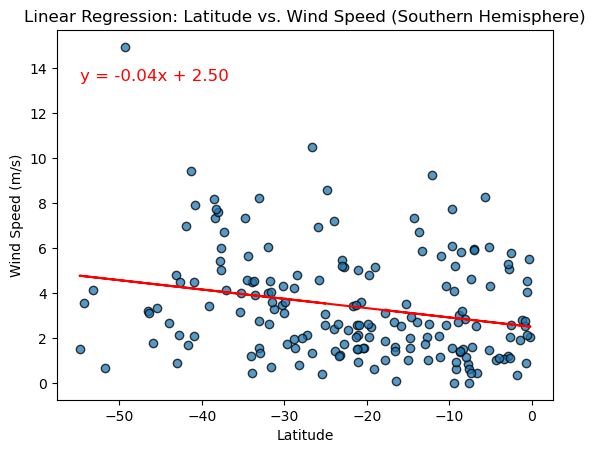

In [70]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)", 
    "Latitude", 
    "Wind Speed (m/s)"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE